# Problem 1


In [69]:
#imports
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import networkx as nx
from collections import defaultdict




In [43]:
#a.1)

#Adjacency matrix, copied from the assignment
Adj = [
    [0, 1, 0, 0, 0, 0],  
    [0, 1, 1, 1, 0, 0],  
    [1, 1, 0, 0, 1, 0],  
    [0, 0, 0, 0, 1, 1],  
    [0, 0, 1, 1, 0, 0],  
    [0, 0, 0, 1, 0, 0]   
]

def adj_matrix_to_adj_list(matrix):
    adj_list = []
    for i in range(len(matrix)):
        adj_list.append([])
        for j in range(len(matrix)):
            if matrix[i][j] == 1:
                adj_list[i].append(j)
    return adj_list


def adj_matrix_to_list(matrix):
    adj_list = {}
    for i in range(len(matrix)):
        adj_list[chr(65 + i)] = sorted([chr(65 + j) for j in range(len(matrix[i])) if matrix[i][j] == 1])
    return adj_list

print(adj_matrix_to_adj_list(Adj))
print(adj_matrix_to_list(Adj))

[[1], [1, 2, 3], [0, 1, 4], [4, 5], [2, 3], [3]]
{'A': ['B'], 'B': ['B', 'C', 'D'], 'C': ['A', 'B', 'E'], 'D': ['E', 'F'], 'E': ['C', 'D'], 'F': ['D']}


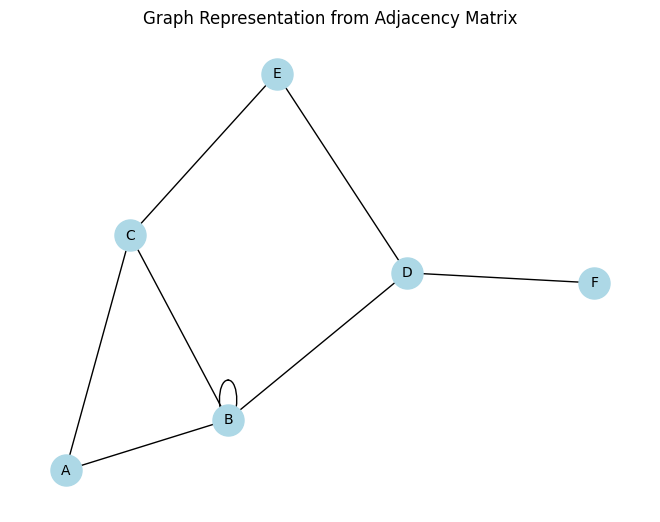

In [44]:
#a.2)
G = nx.Graph()

for i in range(len(Adj)):
    for j in range(len(Adj[i])):
        if Adj[i][j] == 1:
            G.add_edge(chr(65 + i), chr(65 + j))

nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.title("Graph Representation from Adjacency Matrix")
plt.show()


In [45]:
#a.3)


In [46]:
# #b)
# from collections import defaultdict, deque

# class Graph:
#     def __init__(self):
#         self.graph = defaultdict(list)

#     def add_edge(self, u, v):
#         self.graph[u].append(v)

#     def bfs(self, start):
#         visited = set()
#         queue = deque([start])
#         result = []

#         while queue:
#             node = queue.popleft()
#             if node not in visited:
#                 visited.add(node)
#                 result.append(node)
#                 for neighbor in sorted(self.graph[node]):
#                     if neighbor not in visited:
#                         queue.append(neighbor)

#         print("BFS Order:", ' → '.join(result))

#     def dfs_util(self, node, visited, start_time, finish_time, time_counter, result):
#         visited.add(node)
#         time_counter[0] += 1
#         start_time[node] = time_counter[0]
#         result.append(node)

#         for neighbor in sorted(self.graph[node]):
#             if neighbor not in visited:
#                 self.dfs_util(neighbor, visited, start_time, finish_time, time_counter, result)

#         time_counter[0] += 1
#         finish_time[node] = time_counter[0]

#     def dfs(self, start):
#         visited = set()
#         start_time = {}
#         finish_time = {}
#         time_counter = [0]  # Using a list to pass by reference
#         result = []

#         self.dfs_util(start, visited, start_time, finish_time, time_counter, result)

#         print("DFS Order:", ' → '.join(result))
#         print("Start Times:", start_time)
#         print("Finish Times:", finish_time)


# def main():
#     g = Graph()

#     edges = [
#         ('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'E'), ('E', 'F'), ('E', 'G'),
#         ('D', 'F'), ('F', 'H'), ('H', 'I'), ('H', 'J'), ('J', 'I')
#     ]

#     for u, v in edges:
#         g.add_edge(u, v)

#     print("--- Breadth-First Search (BFS) ---")
#     g.bfs('A')

#     print("\n--- Depth-First Search (DFS) ---")
#     g.dfs('A')


# if __name__ == "__main__":
#     main()



# Problem 2
## Cable Network


In [56]:
#Exercise 2
# a)

#list of edges, copied from the assignment

edges = [
    ('A', 'D', 1), ('A', 'B', 5), ('B', 'D', 4), ('D', 'C', 2),
    ('D', 'E', 2), ('C', 'G', 6), ('D', 'F', 4), ('E', 'F', 8),
    ('F', 'G', 9), ('F', 'H', 7), ('E', 'H', 8)
]

#sorting the edges by weight
edges = sorted(edges, key=lambda x: x[2])


#helper functions for kruskal's algorithm
def find(parent, i):
    if parent[i] == i:
        return i
    return find(parent, parent[i])


#union function for kruskal's algorithm
def union(parent, rank, x, y):
    xroot = find(parent, x)
    yroot = find(parent, y)

    if rank[xroot] < rank[yroot]:
        parent[xroot] = yroot
    elif rank[xroot] > rank[yroot]:
        parent[yroot] = xroot
    else:
        parent[yroot] = xroot
        rank[xroot] += 1


#kruskal's algorithm
def kruskal(edges):
    parent = {node: node for edge in edges for node in edge[:2]}
    rank = {node: 0 for edge in edges for node in edge[:2]}

    mst = []
    total_cost = 0

    for u, v, weight in edges:
        if find(parent, u) != find(parent, v):
            mst.append((u, v, weight))
            total_cost += weight
            union(parent, rank, u, v)

    return mst, total_cost

#running kruskal's algorithm
mst, total_cost = kruskal(edges)
mst, total_cost
print("Minimum Spanning Tree:")
pprint(mst)
print(f"The total cost of the minimum spanning tree is: {total_cost}")

Minimum Spanning Tree:
[('A', 'D', 1),
 ('D', 'C', 2),
 ('D', 'E', 2),
 ('B', 'D', 4),
 ('D', 'F', 4),
 ('C', 'G', 6),
 ('F', 'H', 7)]
The total cost of the minimum spanning tree is: 26


In [68]:
#2b

#Restricing D to only have a maximum of 3 edges

def kruskal_max_edges(edges, restriced_node, max_edges):
    parent = {node: node for edge in edges for node in edge[:2]}
    rank = {node: 0 for edge in edges for node in edge[:2]}

    mst = []
    total_cost = 0
    edge_count = {node: 0 for edge in edges for node in edge[:2]}

    for u, v, weight in edges:

        if u == restriced_node and edge_count[u] >= max_edges:
            continue
        if v == restriced_node and edge_count[v] >= max_edges:
            continue

        if find(parent, u) != find(parent, v):
            mst.append((u, v, weight))
            total_cost += weight
            union(parent, rank, u, v)

            if u == restriced_node:
                edge_count[u] += 1
            if v == restriced_node:
                edge_count[v] += 1

        if len(mst) == len(parent) - 1:
            break
    
    return mst, total_cost


restricted_mst, restricted_cost = kruskal_max_edges(edges, 'D', 3)
restricted_mst, restricted_cost

print("Minimum Spanning Tree:")
pprint(mst)
print(f"The total cost of the minimum spanning tree with max 3 edes on D is: {restricted_cost}")


Minimum Spanning Tree:
[('A', 'D', 1),
 ('A', 'B', 6),
 ('C', 'D', 2),
 ('D', 'E', 2),
 ('D', 'F', 4),
 ('C', 'G', 5),
 ('F', 'H', 7)]
The total cost of the minimum spanning tree with max 3 edes on D is: 31


In [65]:
#new edges

new_edges = [
    ('A', 'D', 1), ('A', 'B', 6), ('B', 'D', 4), ('C', 'D', 2),
    ('D', 'E', 2), ('D', 'F', 4), ('C', 'G', 5), ('F', 'G', 9),
    ('F', 'H', 7), ('E', 'F', 8), ('E', 'H', 8)
]

#running kruskal's algorithm with the new edges
mst, total_cost = kruskal(new_edges)
mst, total_cost


print("Minimum Spanning Tree:")
pprint(mst)
print(f"The total cost of the minimum spanning tree is with the new edges: {total_cost}")

Minimum Spanning Tree:
[('A', 'D', 1),
 ('A', 'B', 6),
 ('C', 'D', 2),
 ('D', 'E', 2),
 ('D', 'F', 4),
 ('C', 'G', 5),
 ('F', 'H', 7)]
The total cost of the minimum spanning tree is with the new edges: 27


# Problem 3
## Problem Finding Champion

In [70]:
#a)

def find_champions(graph):
    def dfs(node, visited):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                dfs(neighbor, visited)

    nodes = list(graph.keys())
    champions = []

    for node in nodes:
        visited = set()
        dfs(node, visited)
        if len(visited) == len(nodes):
            champions.append(node)

    return champions

#creating the graph
graph = defaultdict(list)

#graphs from the assignment (figure 5)
graph['A'] = ['B', 'D']
graph['B'] = ['C']
graph['C'] = ['E', 'F']
graph['D'] = ['C']
graph['E'] = ['F', 'G']
graph['F'] = ['E']
graph['G'] = ['E']


results = find_champions(graph)
print("Champions:", results)


Champions: ['A']


In [81]:
class Graph:
    def __init__(self, vertices, node_names):
        self.V = vertices
        self.node_names = node_names
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)

    def dfs_util(self, v, visited, stack):
        visited[v] = True

        for neighbor in self.graph[v]:
            if not visited[neighbor]:
                self.dfs_util(neighbor, visited, stack)
        
        stack.append(v)

    def transpose(self):
        transposed_graph = Graph(self.V, self.node_names)
        for v in self.graph:
            for neighbor in self.graph[v]:
                transposed_graph.add_edge(neighbor, v)
        return transposed_graph
    
    def kosaraju(self):
        stack = []
        visited = [False] * self.V

        for i in range(self.V):
            if not visited[i]:
                self.dfs_util(i, visited, stack)

        gr = self.transpose()

        visited = [False] * self.V
        result = []

        while stack:
            i = stack.pop()
            if not visited[i]:
                temp = []
                gr.dfs_util(i, visited, temp)
                result.append([self.node_names[n] for n in temp])
        
        return result


#from assignment
node_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']  # List of node names
g = Graph(7, node_names)
g.add_edge(0, 1)  # A -> B
g.add_edge(1, 2)  # B -> C
g.add_edge(2, 0)  # C -> A
g.add_edge(3, 2)  # D -> C
g.add_edge(4, 5)  # E -> F
g.add_edge(5, 6)  # F -> G
g.add_edge(6, 4)  # G -> E

results = g.kosaraju()

print("Strongly Connected Components:")
for result in results:
    print(result)



Strongly Connected Components:
['F', 'G', 'E']
['D']
['B', 'C', 'A']
